In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [10]:
# Get column names for 'measurement'
measurement_cols = inspector.get_columns('measurement')
print(f"{6*'#'} Measurement {6*'#'}")
for col in measurement_cols:
    print(col['name'], col['type'])

# Get column names for 'station'
station_cols = inspector.get_columns('station')
print(f"\n{8*'#'} Station {8*'#'}")
for col in station_cols:
    print(col['name'], col['type'])

###### Measurement ######
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

######## Station ########
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(Measurement.date)).one()
latest_date

('2017-08-23',)

2016-08-22 00:00:00
            Date  Precipitation
0     2016-08-23            0.0
1     2016-08-23            0.5
2     2016-08-23            1.3
3     2016-08-23           17.8
4     2016-08-23            3.8
...          ...            ...
2016  2017-08-22           12.7
2017  2017-08-23            0.0
2018  2017-08-23            2.0
2019  2017-08-23            0.0
2020  2017-08-23           11.4

[2021 rows x 2 columns]


[Text(0, 0, '2016-08-23'),
 Text(453, 0, '2016-11-09'),
 Text(906, 0, '2017-01-28'),
 Text(1359, 0, '2017-04-19'),
 Text(1812, 0, '2017-07-10')]

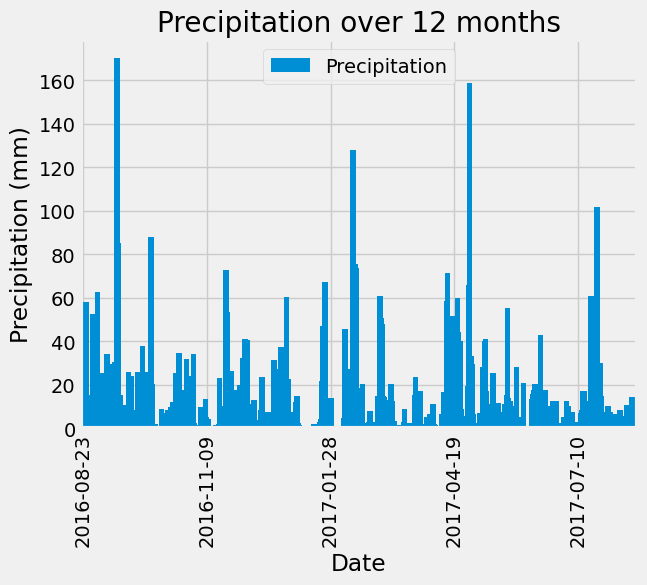

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_string = latest_date[0].split('-')
dt_date = dt.datetime(
    int(date_string[0]),
    int(date_string[1]),
    int(date_string[2]))

# Calculate the date one year from the last date in data set.
year_ago = dt_date - dt.timedelta(days=366)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation']).dropna(how='any')

# Sort the dataframe by date
sorted_prcp = prcp_df.sort_values(by=['Date']).reset_index(drop=True)
print(sorted_prcp)
# Use Pandas Plotting with Matplotlib to plot the data
sample = np.arange(0, len(sorted_prcp['Date']), 453)

x_ticks = []
for value in sample:
    x_ticks.append(sorted_prcp.loc[value, 'Date'])
x_ticks


bar_chart = sorted_prcp.plot(
    kind = 'bar',
    title = 'Precipitation over 12 months',
    xlabel = 'Date',
    ylabel = 'Precipitation (mm)',
    xticks = sample,
    width = 20)
bar_chart.set_xticklabels(labels = x_ticks)
# sample = np.arange(0, len(sorted_prcp['Date']), 5)
# sample




# bar_chart.set_xticklabels(labels = ['2016-08-23'])
# x_axis_range = np.arange(len(sorted_prcp['Date']))
# plt.xticks(x_axis_range, labels=sorted_prcp['Date'])

Text(0, 0.5, 'mm')

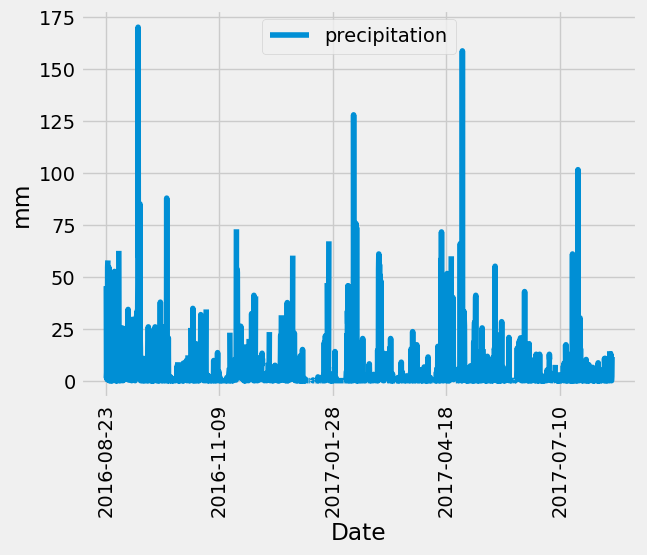

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 4.183333333333314, 'Temperature')

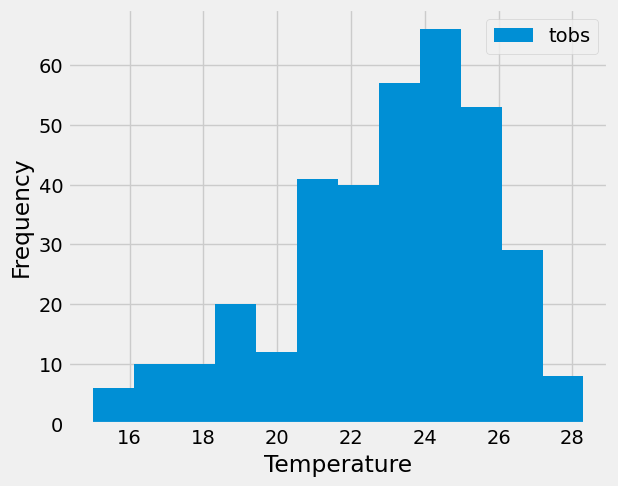

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()